1. Import Dependencies

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import tensorflow as tf


2. Load dataset

In [2]:
df=pd.read_csv("diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
df[df["Outcome"]==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
10,4,110,92,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0


In [8]:
df[df["Outcome"]==1]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
755,1,128,88,39,110,36.5,1.057,37,1
757,0,123,72,0,0,36.3,0.258,52,1
759,6,190,92,0,0,35.5,0.278,66,1
761,9,170,74,31,0,44.0,0.403,43,1


In [ ]:
len(df[df['Outcome']==1]), len(df[df['Outcome']==0])

(268, 500)

3. plot the graphs for data visualisation

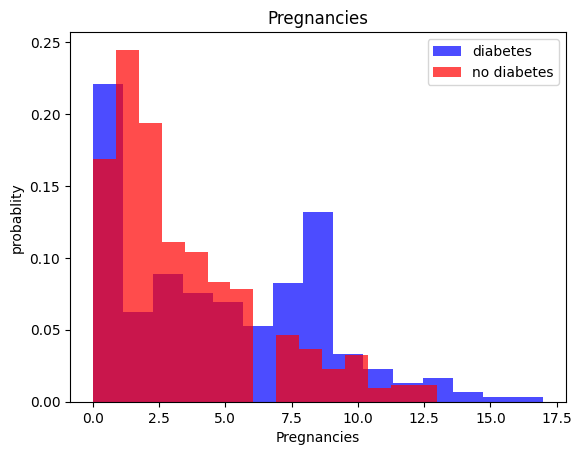

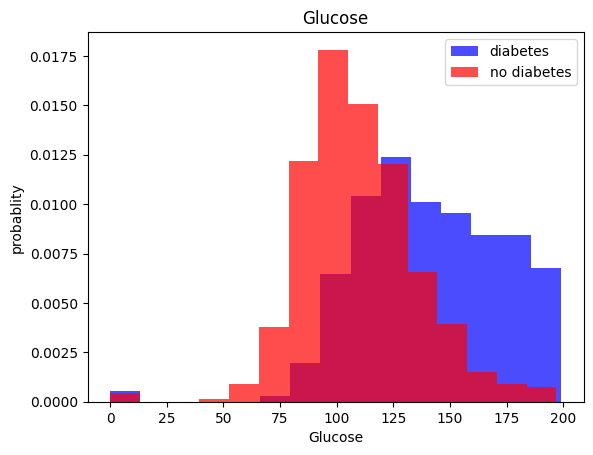

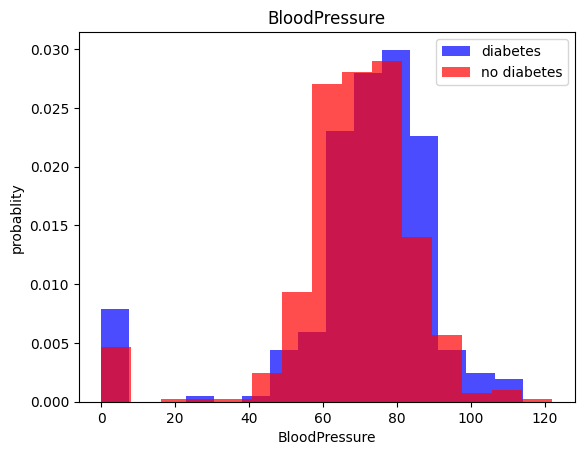

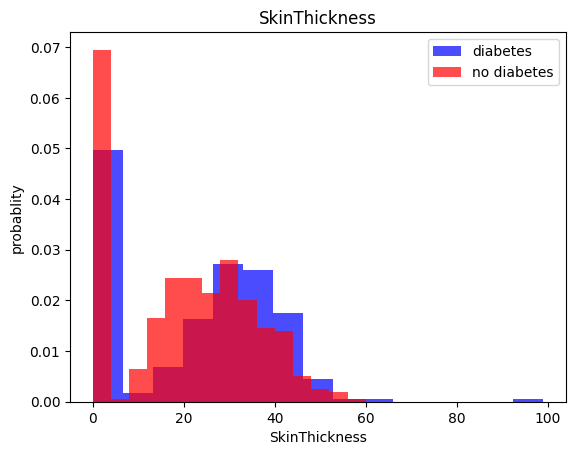

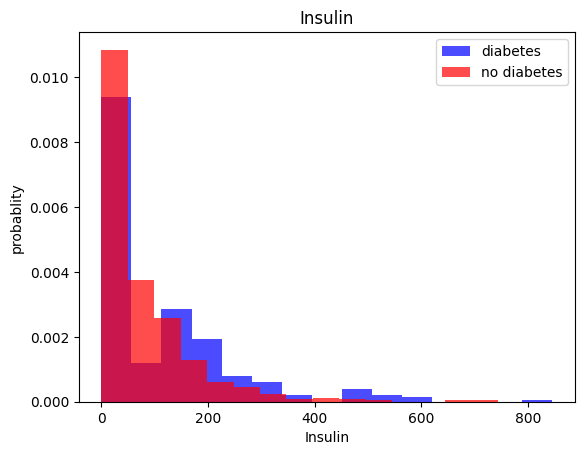

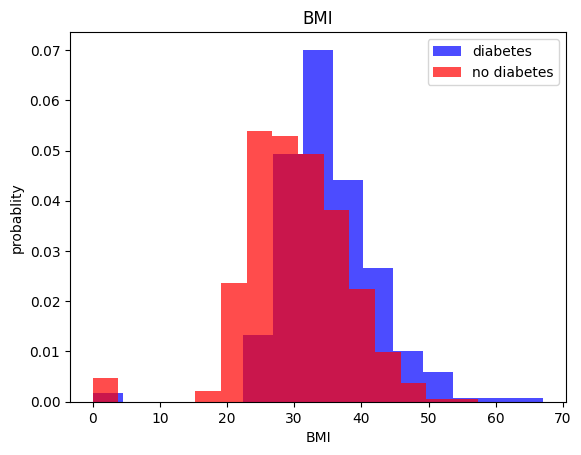

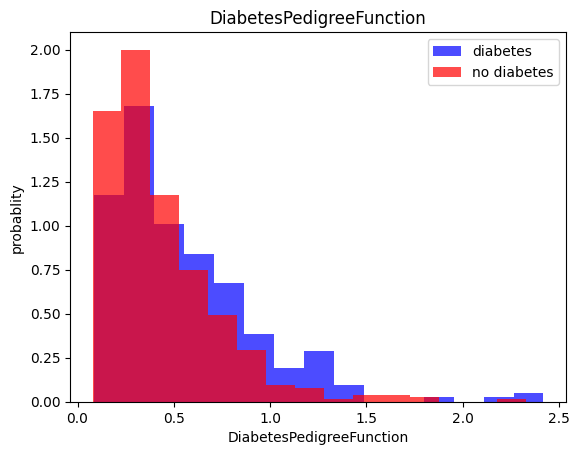

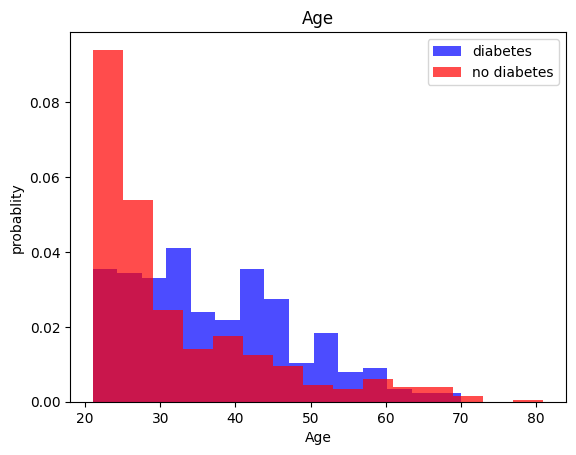

In [9]:
for i in range(len(df.columns[:-1])):
  label=df.columns[i]
  plt.hist(df[df['Outcome']==1][label], color='blue', label='diabetes',alpha=0.7,density=True, bins=15)
  plt.hist(df[df['Outcome']==0][label], color='red',label = 'no diabetes',alpha=0.7,density=True, bins=15)
  plt.title(label)
  plt.ylabel("probablity")
  plt.xlabel(label)
  plt.legend()
  plt.show()

4.split the dataset and normalise its scale

In [10]:
X=df[df.columns[:-1]].values
y=df[df.columns[-1]].values


In [11]:
scaler=StandardScaler()
X=scaler.fit_transform(X)
data=np.hstack((X, np.reshape(y ,(-1,1))))
transformed_df=pd.DataFrame(data,columns=df.columns)

In [12]:
over= RandomOverSampler()
X,y=over.fit_resample(X,y)
data=np.hstack((X, np.reshape(y ,(-1,1))))
transformed_df=pd.DataFrame(data,columns=df.columns)


In [13]:
len(transformed_df[transformed_df["Outcome"]==1]),len(transformed_df[transformed_df["Outcome"]==0])

(500, 500)

In [14]:
X_train ,X_temp ,y_train ,y_temp =train_test_split(X,y , test_size=0.2 ,random_state=0)
X_valid ,X_test ,y_valid ,y_test =train_test_split(X_temp ,y_temp , test_size=0.4 ,random_state=0)

5. Build the Model

In [15]:
model= tf.keras.Sequential([
                            tf.keras.layers.Dense(32, activation='relu'),
                            tf.keras.layers.Dropout(0.2),
                            tf.keras.layers.Dense(32, activation='relu'),
                            tf.keras.layers.Dropout(0.2),
                            tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [16]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [17]:
model.evaluate(X_train,y_train)

25/25 [==============================] - 1s 3ms/step - loss: 0.6750 - accuracy: 0.5387


[0.6750024557113647, 0.5387499928474426]

In [18]:
model.evaluate(X_valid,y_valid)

4/4 [==============================] - 0s 4ms/step - loss: 0.6797 - accuracy: 0.4917


[0.6797032952308655, 0.49166667461395264]

6. Train the Model

In [19]:
model.fit(X_train, y_train , batch_size=32, epochs=20, validation_data=(X_valid ,y_valid))

Epoch 1/20
25/25 [==============================] - 1s 6ms/step - loss: 0.6371 - accuracy: 0.6800 - val_loss: 0.5082 - val_accuracy: 0.7917
Epoch 2/20
25/25 [==============================] - 0s 5ms/step - loss: 0.5707 - accuracy: 0.7175 - val_loss: 0.4875 - val_accuracy: 0.8167
Epoch 3/20
25/25 [==============================] - 0s 4ms/step - loss: 0.5940 - accuracy: 0.6750 - val_loss: 0.4690 - val_accuracy: 0.8083
Epoch 4/20
25/25 [==============================] - 0s 4ms/step - loss: 0.5610 - accuracy: 0.7212 - val_loss: 0.4312 - val_accuracy: 0.8250
Epoch 5/20
25/25 [==============================] - 0s 4ms/step - loss: 0.5659 - accuracy: 0.7250 - val_loss: 0.4589 - val_accuracy: 0.8500
Epoch 6/20
25/25 [==============================] - 0s 4ms/step - loss: 0.5546 - accuracy: 0.7300 - val_loss: 0.4718 - val_accuracy: 0.7750
Epoch 7/20
25/25 [==============================] - 0s 3ms/step - loss: 0.5783 - accuracy: 0.7088 - val_loss: 0.4837 - val_accuracy: 0.7833
Epoch 8/20
25/25 [==

7. Test the Model

In [20]:
model.evaluate(X_test,y_test)

3/3 [==============================] - 0s 7ms/step - loss: 0.5645 - accuracy: 0.7125


[0.5644761919975281, 0.7124999761581421]